# Homework 4 - Pawpularity

It's time to train your first model on ~cats~ real data. The dataset of cute pets is avaialble here -  [Pawpularity Contest - Predict the popularity of shelter pet photos](https://www.kaggle.com/c/petfinder-pawpularity-score/data)


Your task is to predict engagement with a pet's profile based on the photograph for that profile. You are also provided with hand-labelled metadata for each photo. The dataset for this competition therefore comprises both images and tabular data.

In this homework we'll only use tabular meta data. Our goal is to fit linear reggresion on binary features. Let's see if we can do it better than predicting a constant.
![PetFinder.my - Pawpularity Contest](https://www.petfinder.my/images/cuteness_meter-showcase.jpg)

In [117]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(14,9)})
%matplotlib inline

In [118]:
data = pd.read_csv("./data/train.csv") # you can downloand only train.csv from https://www.kaggle.com/c/petfinder-pawpularity-score/data

In [119]:
data

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9907,ffbfa0383c34dc513c95560d6e1fdb57,0,0,0,1,0,0,0,0,0,0,0,1,15
9908,ffcc8532d76436fc79e50eb2e5238e45,0,1,1,1,0,0,0,0,0,0,0,0,70
9909,ffdf2e8673a1da6fb80342fa3b119a20,0,1,1,1,0,0,0,0,1,1,0,0,20
9910,fff19e2ce11718548fa1c5d039a5192a,0,1,1,1,0,0,0,0,1,0,0,0,20


Let's create train/test split. We keep 20% of data for testing model performance

In [120]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2, random_state=42, stratify=data.Pawpularity)
train.shape, test.shape

((7929, 14), (1983, 14))

In [121]:
# Check that you have the same train/test split as othersф
assert(train.iloc[5].Pawpularity == 13)
assert(train.iloc[-5].Face == 1)
assert(test.iloc[5].Group == 1)
assert(test.iloc[-5].Pawpularity == 39)

### Baseline

In [122]:
from sklearn.metrics import mean_squared_error

Create a copy for test dataset:

In [123]:
test = test.copy()

Set baseline based on mean/median/mode:

In [124]:
test['baseline'] = 0 # try to use mean/median/mode as baseline

In [125]:
mean_squared_error(test.Pawpularity, test.baseline, squared=False)

43.28163641116915

### Regression

Let's try to train linear regression on binary features

In [126]:
features = train.columns[1:-1]
features

Index(['Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group',
       'Collage', 'Human', 'Occlusion', 'Info', 'Blur'],
      dtype='object')

In [127]:
train[features]

,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur
3084,0,1,1,1,0,0,0,0,0,0,0,0
9773,0,1,1,1,0,0,0,0,0,0,0,0
1468,0,1,1,1,0,0,0,0,0,0,0,0
7834,1,1,1,1,0,1,0,0,0,0,0,0
2281,0,1,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3000,0,0,1,0,0,0,1,0,1,1,0,0
5708,0,1,1,1,0,0,0,0,0,0,0,0
7667,0,0,0,0,0,0,1,0,0,0,0,0
7411,0,1,1,1,0,0,0,0,0,0,0,0


In [128]:
y_true = train.columns[-1]
y_true

'Pawpularity'

In [129]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# LinearRegression

In [130]:
model = LinearRegression() # Compare several regression models, select the best. Don't forget to tune hyper params

In [131]:
# Train your model here:
model.fit(train[features], train[y_true])
test_pred = test.copy()
test_pred['pred'] = model.predict(test_pred.iloc[:, 1:-2])
test_pred[['Pawpularity','pred']]

,Pawpularity,pred
6600,38,37.957221
3336,2,37.940408
4785,42,37.928493
2128,24,38.177026
4162,45,37.957221
...,...,...
1243,39,37.957221
9608,33,37.708688
7250,41,39.062426
3025,2,33.787974


Calculate score:

In [132]:
mean_squared_error(test_pred.Pawpularity, test_pred.pred, squared=False)

20.613211282893758

Check params:

In [133]:
list(zip(features, model.coef_)) # model's weights

[('Subject Focus', -1.3184191941230023),
 ('Eyes', -1.9247962162298862),
 ('Face', 2.107441598807193),
 ('Near', 0.016812750702490442),
 ('Action', -0.9241970093571129),
 ('Accessory', 1.2659010714807677),
 ('Group', 1.1052053508764017),
 ('Collage', 0.6555508044163001),
 ('Human', 0.2198050189211509),
 ('Occlusion', -0.24853320175799543),
 ('Info', -1.453131808612996),
 ('Blur', -3.957873216082503)]

In [134]:
model.intercept_ # model's bias

37.75776263342286

Analyze errors: 

<AxesSubplot:xlabel='pred', ylabel='Pawpularity'>

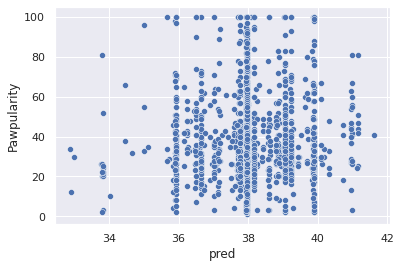

In [135]:
## True value / pred value plot:
sns.scatterplot(x=test_pred.pred, y=test_pred.Pawpularity)

<AxesSubplot:ylabel='Count'>

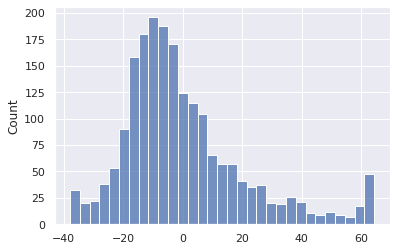

In [136]:
## Errors distribution:
sns.histplot(test_pred.Pawpularity - test_pred.pred)

# Lasso regression (L1)

In [137]:
model = Lasso(alpha=0.01, selection='random') 

In [138]:
# Train your model here:
model.fit(train[features], train[y_true])
test_pred_lasso = test.copy()


In [139]:
test_pred_lasso['pred'] = model.predict(test_pred_lasso[features])
test_pred_lasso[['Pawpularity','pred']]

,Pawpularity,pred
6600,38,37.973355
3336,2,37.973355
4785,42,37.933135
2128,24,37.999018
4162,45,37.973355
...,...,...
1243,39,37.973355
9608,33,37.907472
7250,41,38.977321
3025,2,34.219884


In [140]:
test_pred_lasso.loc[[3336, 4785, 2128, 1290]]

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity,baseline,pred
3336,562c19b150a2ad83c75a22fb81e6513a,0,1,1,0,0,0,0,0,0,0,0,0,2,0,37.973355
4785,7b2a921cc744aecdd5d4a77ebf3a3d9c,0,1,1,1,0,0,0,0,1,1,0,0,42,0,37.933135
2128,36e737146cadf7efd80eb95680e7dc86,0,1,1,1,0,0,0,0,1,0,0,0,24,0,37.999018
1290,21384c98092f98e016541c7d64c1f36f,0,1,1,1,0,0,0,0,1,1,0,0,45,0,37.933135


In [141]:
mean_squared_error(test_pred_lasso.Pawpularity, test_pred_lasso.pred, squared=False)

20.61131817259331

In [142]:
list(zip(features, model.coef_)) # model's weights

[('Subject Focus', -0.9527023119521487),
 ('Eyes', -1.5908664661250482),
 ('Face', 1.7434774982853294),
 ('Near', -0.0),
 ('Action', -0.0),
 ('Accessory', 1.0802948771485712),
 ('Group', 1.003965156832667),
 ('Collage', 0.29185637374291934),
 ('Human', 0.025662613505061767),
 ('Occlusion', -0.06588299499370373),
 ('Info', -1.1142951633366642),
 ('Blur', -3.5606404337096524)]

In [143]:
model.intercept_ # model's bias

37.82074435850862

<AxesSubplot:xlabel='pred', ylabel='Pawpularity'>

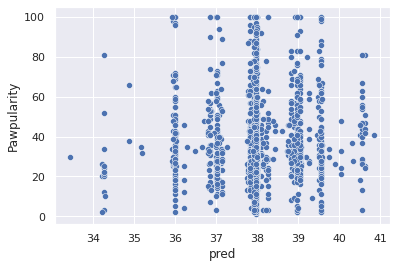

In [144]:
## True value / pred value plot:
sns.scatterplot(x=test_pred_lasso.pred, y=test_pred_lasso.Pawpularity)

<AxesSubplot:ylabel='Count'>

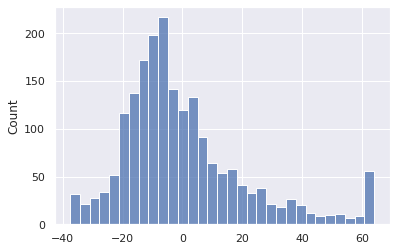

In [145]:
## Errors distribution:
sns.histplot(test_pred_lasso.Pawpularity - test_pred_lasso.pred)

# Ridge (L2)

In [146]:
model = Ridge(alpha=.5, solver='cholesky') 

In [147]:
# Train your model here:
model.fit(train[features], train[y_true])
test_pred_ridge = test.copy()

In [148]:
test_pred_ridge['pred'] = model.predict(test_pred_lasso[features])
test_pred_ridge[['Pawpularity','pred']]

,Pawpularity,pred
6600,38,37.957312
3336,2,37.940896
4785,42,37.928518
2128,24,38.176933
4162,45,37.957312
...,...,...
1243,39,37.957312
9608,33,37.708897
7250,41,39.061796
3025,2,33.795927


In [149]:
mean_squared_error(test_pred_ridge.Pawpularity, test_pred_ridge.pred, squared=False)

20.613195304329164

In [150]:
model.intercept_ # model's bias

37.75834914343588

<AxesSubplot:xlabel='pred', ylabel='Pawpularity'>

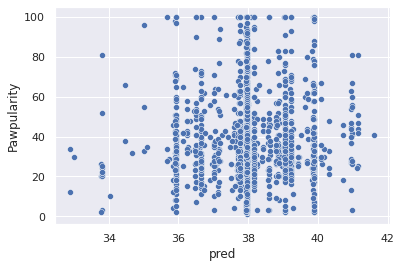

In [151]:
## True value / pred value plot:
sns.scatterplot(x=test_pred_ridge.pred, y=test_pred_ridge.Pawpularity)

<AxesSubplot:ylabel='Count'>

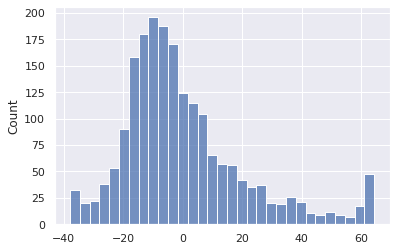

In [152]:
## Errors distribution:
sns.histplot(test_pred_ridge.Pawpularity - test_pred_ridge.pred)

**Compare several regression models (L1, L2 regularization), select the best. Don't forget to tune hyperparams**

Print your best score and what type of regression you used to achieve it:

**Best score 20.611 with Ridge or simple Regression**

### Polinomial Regression
Do polynomial features improve the score?

In [153]:
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import PolynomialFeatures

[make_pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html) helps to combine several steps into one model

In [154]:
degree=2
model = make_pipeline(
    PolynomialFeatures(degree),LinearRegression()
)

In [155]:
# Hint: to check wieght use:
#list(zip(t.get_feature_names(input_features=features), model.steps[1][1].coef_)) # model's weights

In [156]:
def create_model(degree):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    return model
predictions = []
for degree in [1,2,3,4]:
    model = create_model(degree)
    model.fit(train[features], train[y_true])
    test_pred_poly = test.copy()
    test_pred_poly['pred'] = model.predict(test_pred_poly[features])
    predictions.append({'degree':degree, 'preds': test_pred_poly})

Print your best score with pollinomial reggresion:

In [157]:
for prediction in predictions:
    error = mean_squared_error(prediction['preds'].Pawpularity, prediction['preds'].pred, squared=False)
    print(f'Degree: {prediction["degree"]}, error: {error}')

Degree: 1, error: 20.613211282893758
Degree: 2, error: 20.645779166421455
Degree: 3, error: 77534632096.10626
Degree: 4, error: 733560145255.7272


Polinoms of 1 is best, of 2 also not so bad. Higher degree doesnt make any sense

### Feature selection

Let's use Lasso for feature selection. Sklearn's [SelectFromModel](https://scikit-learn.org/stable/modules/feature_selection.html#feature-selection-using-selectfrommodel) will help

In [166]:
from sklearn.feature_selection import SelectFromModel ## 

In [167]:
select_lasso = SelectFromModel(Lasso(alpha=0.01, selection='random'))
select_lasso.fit(train[features], train[y_true])
print(select_lasso.transform(train[features]).shape)


(7929, 10)


In [168]:
print(select_lasso.estimator_.coef_) 

[-0.95239998 -1.59173831  1.74415532 -0.         -0.          1.08032318
  1.0039513   0.29190533  0.02567486 -0.0658716  -1.1142801  -3.56129485]


Print your best score with feature selection:

In [169]:
pipe_lasso = make_pipeline(select_lasso, Lasso(alpha=0.01, selection='random'))

In [170]:
pipe_lasso.fit(train[features], train[y_true])
test_pred_select = test.copy()
test_pred_poly['pred'] = pipe_lasso.predict(test_pred_select[features])

In [171]:
mean_squared_error(test_pred_poly.Pawpularity, test_pred_poly.pred, squared=False)

20.611316158284673